In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [3]:
print(df.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [4]:
df[1]=df[1].replace({'M':1,'B':0})

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_16364\417157543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[1]=df[1].replace({'M':1,'B':0})


In [1]:
df.corr()

In [2]:
df.describe()

In [7]:
X=df[[2,3,4,5,6,7,8,9,10]]
y=df[1]

In [8]:
class logisticRegression:
    

    def __init__(self,learning_rate=0.1,epochs=10000):
        self.weight=None
        self.bias=None
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.loss=[]
    def logg_odds(self,X):
        z=self.bias + np.dot(self.weight,X.T)
        return z
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    def gradient_descent_logistics(self,X,y):
        np.random.seed(42)
        self.weight=np.random.randn(X.shape[-1])
        
        self.bias=np.random.randn()
        X=(X-X.mean())/X.std()
        for epoch in range(self.epochs):
            m=len(X)
            z=self.logg_odds(X)
            z = np.clip(z,-500,500)
            # z=self.logg_odds(X)
            y_pred=self.sigmoid(z)
            y_pred = y_pred.reshape(-1)

            error=y_pred - y
            gradient_weight = (1/m) * np.dot(error, X)

            # gradient_weight=(1/m)*np.dot(error,X.T)
            gradient_bias=(1/m)*np.sum(error)

            self.weight -= gradient_weight * self.learning_rate
            self.bias -= gradient_bias* self.learning_rate
            # return self.weight,bias


            losse=-np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
            self.loss.append(losse)
            # print(self.loss)

In [9]:
lr=logisticRegression()
lr.gradient_descent_logistics(X,y)
# lr.predict(X)

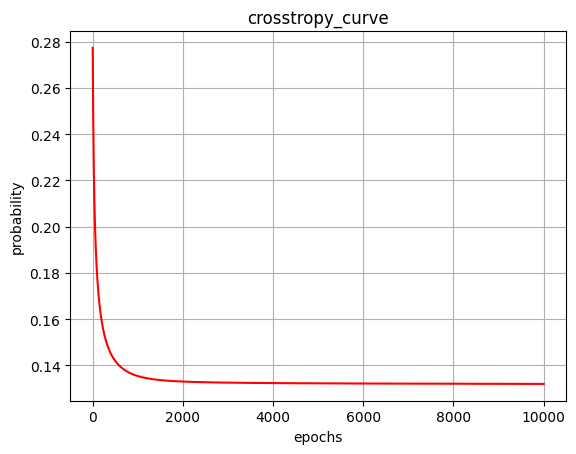

In [10]:
plt.plot(lr.loss,color='red')
plt.xlabel('epochs')
plt.ylabel('probability')
plt.title('crosstropy_curve')
plt.grid(True)
plt.show()

In [11]:
data= pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

In [12]:
data.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
X=df[[0,1,2,3,4,5,6,7]]
y=df[8]
X=(X-X.mean())/X.std()


In [14]:
class regression_l2_regularisation:
    def __init__(self,lr=0.001,l2_lambda=0.01,Epochs=1000,batch_size=30):
        self.lr=lr
        self.l2_lambda=l2_lambda
        self.Epochs=Epochs
        self.batch_size=batch_size
        self.weight=None
        self.bias=None
        self.loss_history=[]
    def log_odds(self,X):
        return np.dot(self.weight,X.T) + self.bias
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    def train_(self,X,y):
        np.random.seed(42)
        self.weight=np.random.randn(X.shape[1])
        self.bias=np.random.randn()
        n_samples,n_features=X.shape
        for i in range(self.Epochs):
            indeces=np.random.permutation(n_samples)
            X_array = X.to_numpy()
            y_array = y.to_numpy()
            x_shuffle = X_array[indeces]
            y_shuffle = y_array[indeces]

            # x_shuffle=X[indeces]
            # y_shuffle=y[indeces]
            
            for i in range(0,n_samples,self.batch_size):
                X_batch=x_shuffle[i:i+self.batch_size]
                y_batch=y_shuffle[i:i+self.batch_size]
                z=self.log_odds(X_batch)
                predict=self.sigmoid(z)
                error=predict - y_batch

                gradient_weight =(1 / n_features) * np.dot(X_batch.T,error[:, np.newaxis]).flatten()
                gradient_bias=(1/n_features)*np.sum(error)
        
                gradient_weight += 2*self.l2_lambda*self.lr
        

                self.weight -= self.lr*gradient_weight
                self.bias -=self.lr*gradient_bias
                loss=np.mean(y_batch *np.log(predict) +(1 - y_batch)*np.log(1 - predict))

                penalty= self.l2_lambda * np.sum(self.weight **2)
                loss +=penalty
                self.loss_history.append(loss)
            return self.loss_history

In [15]:
s=regression_l2_regularisation()
s.train_(X,y)

[np.float64(-0.8307614190144809),
 np.float64(-0.6791462097323568),
 np.float64(-0.974741527145364),
 np.float64(-0.6176075266919772),
 np.float64(-0.6274642115617768),
 np.float64(-0.8564751718999083),
 np.float64(-1.0570397720015146),
 np.float64(-0.6303564875936811),
 np.float64(-1.2242390435332882),
 np.float64(-0.9670686018827295),
 np.float64(-0.8190010757686867),
 np.float64(-0.8918564084989274),
 np.float64(-1.2110281977832444),
 np.float64(-0.9189129483208028),
 np.float64(-0.9344949404880492),
 np.float64(-1.3473431965985172),
 np.float64(-0.9825501264249956),
 np.float64(-1.097202378877797),
 np.float64(-0.6950847490535529)]

In [16]:
class regression_l2_regularisation7:
    def __init__(self, lr=0.001, l2_lambda=0.01, Epochs=1000, batch_size=30):
        self.lr = lr
        self.l2_lambda = l2_lambda
        self.Epochs = Epochs
        self.batch_size = batch_size
        self.weight = None
        self.bias = None
        self.loss_history = []

    def log_odds(self, X):
        return np.dot(self.weight, X.T) + self.bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train_(self, X, y):
        np.random.seed(42)
        self.weight = np.random.randn(X.shape[1])  # Fix weight initialization to match features
        self.bias = np.random.randn()
        n_samples, n_features = X.shape

        for i in range(self.Epochs):
            indeces = np.random.permutation(n_samples)
            X_array = X.to_numpy()
            y_array = y.to_numpy()
            x_shuffle = X_array[indeces]
            y_shuffle = y_array[indeces]

            # x_shuffle = X[indeces]
            # y_shuffle = y[indeces]

            for j in range(0, n_samples, self.batch_size):  # Fix indentation here
                X_batch = x_shuffle[j:j+self.batch_size]
                y_batch = y_shuffle[j:j+self.batch_size]

                z = self.log_odds(X_batch)
                predict = self.sigmoid(z)
                error = predict - y_batch

                gradient_weight = (1/n_features) * np.dot(error, X_batch)
                gradient_bias = (1/n_features) * np.sum(error)

                gradient_weight += 2 * self.l2_lambda * self.lr

                self.weight -= self.lr * gradient_weight  # Use self.lr
                self.bias -= self.lr * gradient_bias      # Use self.lr
                
                loss = -np.mean(y_batch * np.log(predict) + (1 - y_batch) * np.log(1 - predict))  # Fix loss calculation
                penalty = self.l2_lambda * np.sum(self.weight ** 2)
                loss += penalty
                
                self.loss_history.append(loss)

        # print(self.loss_history)


In [17]:
d=regression_l2_regularisation7()
d.train_(X,y)